In [ ]:
!pip install seaborn

In [ ]:
!pip install matplotlib

In [53]:
import pandas as pd

In [54]:
import openpyxl

In [55]:
df_train=pd.read_excel("shihara_train_30days_version2.xlsx")
df_test=pd.read_excel("shihara_test_30days_version2.xlsx")

In [56]:
df_train.tail()

,Date,Discription,Payments,Receipts,Balance,cleaned_particulars,Category,Cluster
364,2024-11-27,PURCHASE SRI LANKA TELECOM P,4900.00,NaN,113607.85,purchase sri lanka telecom p,Electronics,19
365,2024-11-29,ADVANCE INCOME TAX,7.91,NaN,113758.04,advance income tax,ADVANCE INCOME TAX,6
366,2024-12-03,IB CEFT CHGS WA A Sewwandi,30.00,NaN,105038.04,ib ceft chgs wa a sewwandi,Uncategorized,-1
367,2024-12-03,shihara,7190.00,NaN,105068.04,shihara,SHIHARA,8
368,2024-12-03,PURCHASE Dialog Axiata PLC,1500.00,NaN,112258.04,purchase dialog axiata plc,Electronics,19


In [57]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 15 non-null     datetime64[ns]
 1   Discription          15 non-null     object        
 2   Payments             15 non-null     float64       
 3   Receipts             0 non-null      float64       
 4   Balance              15 non-null     float64       
 5   cleaned_particulars  15 non-null     object        
 6   Category             15 non-null     object        
 7   Cluster              15 non-null     int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 1.1+ KB


In [58]:
# Additional imports for data preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration and Initial Analysis

Let's first explore our training data to understand its structure and content.

In [59]:
# Step 1: Examine the structure and content of training data
print("Training Data Shape:", df_train.shape)
print("\nColumn Names:")
print(df_train.columns.tolist())
print("\nFirst 5 rows:")
print(df_train.head())
print("\nData Types:")
print(df_train.dtypes)

Training Data Shape: (369, 8)

Column Names:
['Date', 'Discription', 'Payments', 'Receipts', 'Balance', 'cleaned_particulars', 'Category', 'Cluster']

First 5 rows:
        Date                   Discription  Payments  Receipts   Balance  \
0 2022-12-27  IB CEFT CHGS K A Kumaranayek      30.0       NaN   8449.35   
1 2022-12-27  PURCHASE UNIVERSITY GRANTS C      50.0       NaN   8399.35   
2 2022-12-28  PURCHASE KEELLS SUPER - MORA    5000.0       NaN   3399.35   
3 2023-01-04                       shiroma    3000.0       NaN  75440.92   
4 2023-01-04     IB CEFT CHGS tvf Fernando      30.0       NaN  75410.92   

            cleaned_particulars                     Category  Cluster  
0  ib ceft chgs k a kumaranayek                Uncategorized       -1  
1  purchase university grants c                Uncategorized       -1  
2  purchase keells super - mora     PURCHASE KEELLS MORATUWA       15  
3                       shiroma                      SHIROMA        0  
4     ib ceft chgs

# Step 2: Data Cleaning and Initial Preprocessing

We'll extract Date and Balance columns and clean the data.

In [60]:
# Extract and prepare balance data
df_balance = df_train[["Date", "Balance"]].copy()

# Remove the first row (often contains headers or metadata)
df_balance = df_balance.drop(0)

# Convert Date column to datetime
df_balance['Date'] = pd.to_datetime(df_balance['Date'])

# Display the cleaned data
print("Cleaned Data Shape:", df_balance.shape)
print("\nFirst 5 rows after cleaning:")
print(df_balance.head())
print("\nLast 5 rows:")
print(df_balance.tail())

Cleaned Data Shape: (368, 2)

First 5 rows after cleaning:
        Date   Balance
1 2022-12-27   8399.35
2 2022-12-28   3399.35
3 2023-01-04  75440.92
4 2023-01-04  75410.92
5 2023-01-05  94410.92

Last 5 rows:
          Date    Balance
364 2024-11-27  113607.85
365 2024-11-29  113758.04
366 2024-12-03  105038.04
367 2024-12-03  105068.04
368 2024-12-03  112258.04


In [61]:
# Clean and convert Balance column to numeric
print("Balance column before conversion:")
print(f"Data type: {df_balance['Balance'].dtype}")
print(f"Sample values: {df_balance['Balance'].head()}")

# Remove any non-numeric values and convert to float
df_balance['Balance'] = pd.to_numeric(df_balance['Balance'], errors='coerce')

# Check for NaN values (were non-numeric)
nan_count = df_balance['Balance'].isna().sum()
print(f"\nNumber of NaN values after conversion: {nan_count}")

# Drop rows where Balance is NaN
if nan_count > 0:
    df_balance = df_balance.dropna(subset=['Balance'])
    print(f"Dropped {nan_count} rows with NaN values")

print(f"\nFinal shape after cleaning: {df_balance.shape}")
print(f"Balance column data type: {df_balance['Balance'].dtype}")

Balance column before conversion:
Data type: float64
Sample values: 1     8399.35
2     3399.35
3    75440.92
4    75410.92
5    94410.92
Name: Balance, dtype: float64

Number of NaN values after conversion: 0

Final shape after cleaning: (368, 2)
Balance column data type: float64


# Step 3: Data Grouping and Time Series Preparation

Group by date, sort, and create a continuous time series.

In [62]:
# Group by date and take the last entry for each date, then sort
df_balance = df_balance.groupby('Date', as_index=False).last()
df_balance = df_balance.sort_values('Date')

print(f"After grouping by date: {df_balance.shape}")
print("\nDate range:")
print(f"Start date: {df_balance['Date'].min()}")
print(f"End date: {df_balance['Date'].max()}")
print(f"Number of unique dates: {df_balance['Date'].nunique()}")

# Set Date as index for time series operations
df_balance = df_balance.set_index('Date')
print(f"\nData with Date as index:")
print(df_balance.head())

After grouping by date: (204, 2)

Date range:
Start date: 2022-12-27 00:00:00
End date: 2024-12-03 00:00:00
Number of unique dates: 204

Data with Date as index:
             Balance
Date                
2022-12-27   8399.35
2022-12-28   3399.35
2023-01-04  75410.92
2023-01-05  94380.92
2023-01-09  93350.92


In [63]:
# Create full date range and reindex to fill missing dates
full_index = pd.date_range(start=df_balance.index.min(), end=df_balance.index.max(), freq='D')
print(f"Full date range length: {len(full_index)}")
print(f"Original data length: {len(df_balance)}")
print(f"Missing dates to be filled: {len(full_index) - len(df_balance)}")

# Reindex with full date range
df_balance = df_balance.reindex(full_index)

# Forward fill missing balance values
df_balance['Balance'] = df_balance['Balance'].ffill()

# Reset index to make Date a column again
df_balance = df_balance.reset_index().rename(columns={'index': 'Date'})

print(f"\nAfter creating continuous time series: {df_balance.shape}")
print(f"Any missing values: {df_balance['Balance'].isna().sum()}")
print("\nSample data:")
print(df_balance.head())

Full date range length: 708
Original data length: 204
Missing dates to be filled: 504

After creating continuous time series: (708, 2)
Any missing values: 0

Sample data:
        Date  Balance
0 2022-12-27  8399.35
1 2022-12-28  3399.35
2 2022-12-29  3399.35
3 2022-12-30  3399.35
4 2022-12-31  3399.35


# Step 4: Outlier Detection and Removal

Use Interquartile Range (IQR) method to identify and remove outliers.

Balance Statistics:
Q1 (25th percentile): 16,541.24
Q3 (75th percentile): 93,350.92
IQR: 76,809.68
Lower bound: -98,673.28
Upper bound: 208,565.44

Number of outliers identified: 43
Outlier values:
count    4.300000e+01
mean     1.086857e+06
std      1.368701e+06
min      3.957071e+05
25%      8.393714e+05
50%      9.021179e+05
75%      1.006024e+06
max      9.811624e+06
Name: Balance, dtype: float64


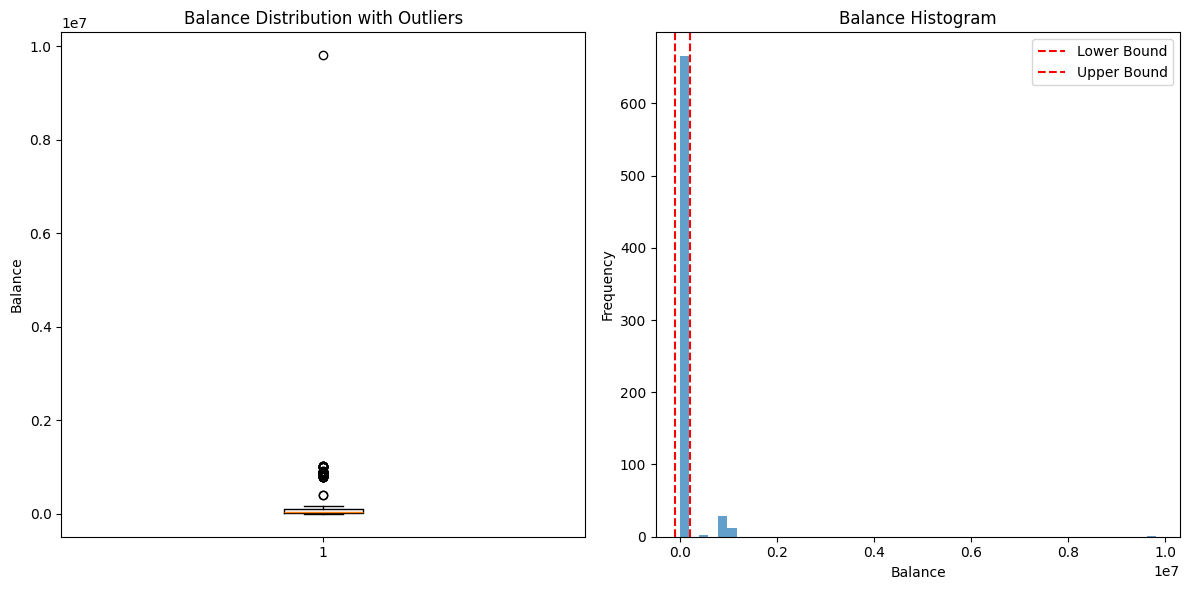

In [64]:
# Calculate quartiles and IQR for outlier detection
Q1 = df_balance['Balance'].quantile(0.25)
Q3 = df_balance['Balance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Balance Statistics:")
print(f"Q1 (25th percentile): {Q1:,.2f}")
print(f"Q3 (75th percentile): {Q3:,.2f}")
print(f"IQR: {IQR:,.2f}")
print(f"Lower bound: {lower_bound:,.2f}")
print(f"Upper bound: {upper_bound:,.2f}")

# Identify outliers
outliers = df_balance[(df_balance['Balance'] < lower_bound) | (df_balance['Balance'] > upper_bound)]
print(f"\nNumber of outliers identified: {len(outliers)}")

if len(outliers) > 0:
    print("Outlier values:")
    print(outliers['Balance'].describe())

# Visualize outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df_balance['Balance'])
plt.title('Balance Distribution with Outliers')
plt.ylabel('Balance')

plt.subplot(1, 2, 2)
plt.hist(df_balance['Balance'], bins=50, alpha=0.7)
plt.axvline(lower_bound, color='r', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='r', linestyle='--', label='Upper Bound')
plt.title('Balance Histogram')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

In [65]:
# Remove outliers
df_balance_clean = df_balance[(df_balance['Balance'] >= lower_bound) & 
                              (df_balance['Balance'] <= upper_bound)].copy()

print(f"Data shape before outlier removal: {df_balance.shape}")
print(f"Data shape after outlier removal: {df_balance_clean.shape}")
print(f"Rows removed: {len(df_balance) - len(df_balance_clean)}")

# Store min and max values for denormalization later
min_balance = df_balance_clean['Balance'].min()
max_balance = df_balance_clean['Balance'].max()

print(f"\nScaling parameters for denormalization:")
print(f"Minimum balance: {min_balance:,.2f}")
print(f"Maximum balance: {max_balance:,.2f}")
print(f"Range: {max_balance - min_balance:,.2f}")

# Update the main dataframe
df_balance = df_balance_clean.copy()

Data shape before outlier removal: (708, 2)
Data shape after outlier removal: (665, 2)
Rows removed: 43

Scaling parameters for denormalization:
Minimum balance: 85.18
Maximum balance: 168,354.71
Range: 168,269.53


# Step 5: Data Normalization

Normalize the balance values to a 0-1 range for better model performance.

In [66]:
# Normalize the balance using Min-Max scaling
df_balance['Normalized_Balance'] = (df_balance['Balance'] - min_balance) / (max_balance - min_balance)

print("Normalization Results:")
print(f"Original balance range: {df_balance['Balance'].min():,.2f} to {df_balance['Balance'].max():,.2f}")
print(f"Normalized balance range: {df_balance['Normalized_Balance'].min():.4f} to {df_balance['Normalized_Balance'].max():.4f}")

# Create final dataset starting with the base features
df_final = df_balance[['Date', 'Normalized_Balance']].copy()

print(f"\nBase dataset shape: {df_final.shape}")
print("\nFirst few rows of normalized data:")
print(df_final.head())

Normalization Results:
Original balance range: 85.18 to 168,354.71
Normalized balance range: 0.0000 to 1.0000

Base dataset shape: (665, 2)

First few rows of normalized data:
        Date  Normalized_Balance
0 2022-12-27            0.049410
1 2022-12-28            0.019696
2 2022-12-29            0.019696
3 2022-12-30            0.019696
4 2022-12-31            0.019696


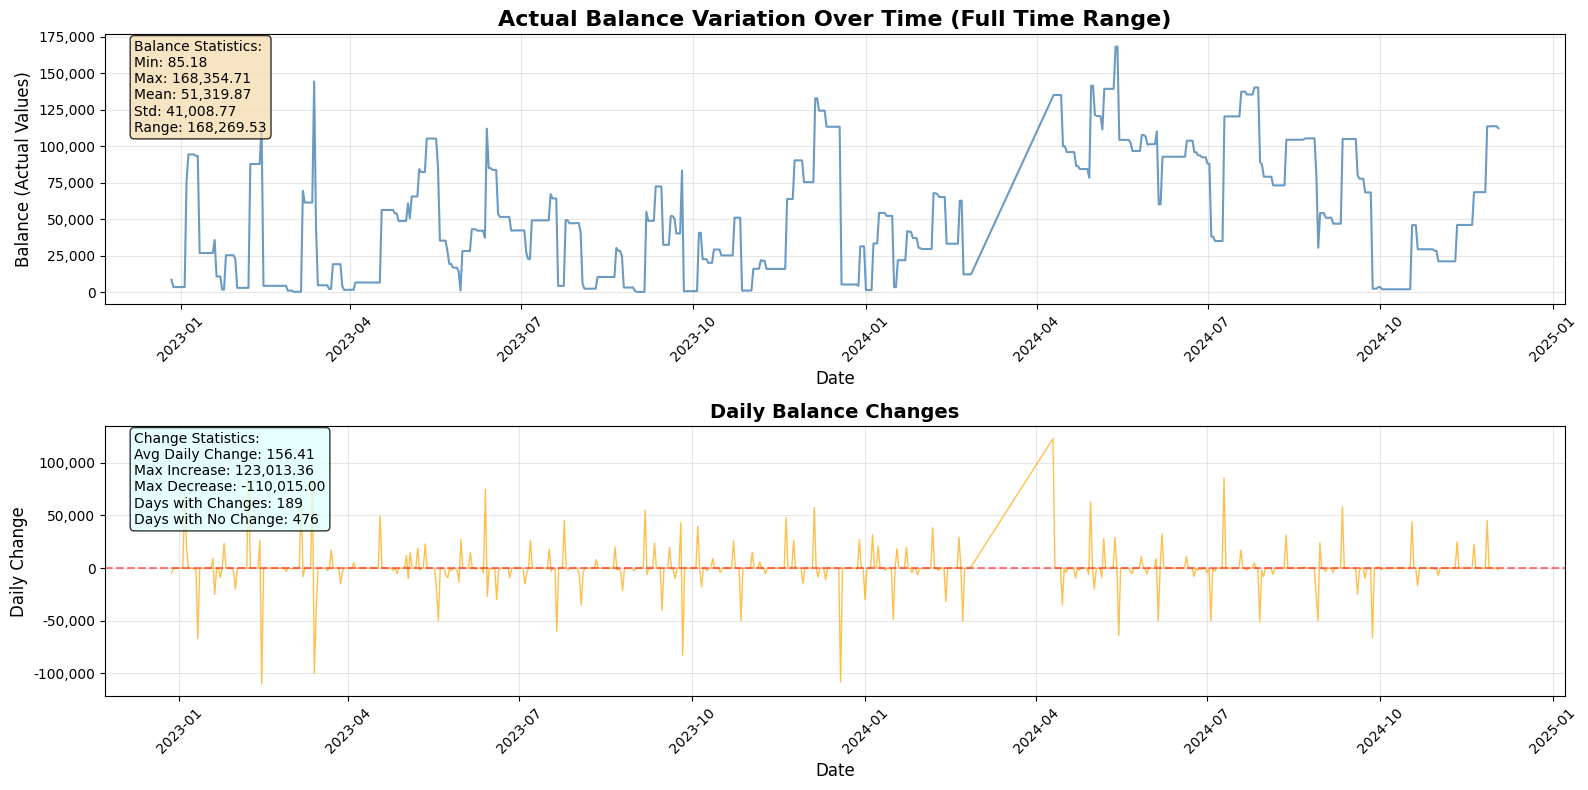

📈 TIME SERIES ANALYSIS:
   • Time period: 2022-12-27 to 2024-12-03
   • Total days: 665
   • Balance range: 85.18 to 168,354.71
   • Average daily balance: 51,319.87
   • Balance volatility (std): 41,008.77
   • Days with balance changes: 189
   • Days with no change: 476
   • Largest single-day increase: 123,013.36
   • Largest single-day decrease: -110,015.00


In [67]:
# Visualize actual balance variation over time (before normalization)
plt.figure(figsize=(16, 8))

# Main time series plot
plt.subplot(2, 1, 1)
plt.plot(df_balance['Date'], df_balance['Balance'], linewidth=1.5, color='steelblue', alpha=0.8)
plt.title('Actual Balance Variation Over Time (Full Time Range)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Balance (Actual Values)', fontsize=12)
plt.grid(True, alpha=0.3)

# Format y-axis to show currency format
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add statistics as text box
stats_text = f'''Balance Statistics:
Min: {df_balance['Balance'].min():,.2f}
Max: {df_balance['Balance'].max():,.2f}
Mean: {df_balance['Balance'].mean():,.2f}
Std: {df_balance['Balance'].std():,.2f}
Range: {df_balance['Balance'].max() - df_balance['Balance'].min():,.2f}'''

plt.text(0.02, 0.98, stats_text, transform=ax.transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Secondary plot: Daily balance changes
plt.subplot(2, 1, 2)
daily_change = df_balance['Balance'].diff()
plt.plot(df_balance['Date'], daily_change, linewidth=1, color='orange', alpha=0.7)
plt.title('Daily Balance Changes', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Change', fontsize=12)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.5)

# Format y-axis to show currency format
ax2 = plt.gca()
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))
plt.xticks(rotation=45)

# Add change statistics
change_stats_text = f'''Change Statistics:
Avg Daily Change: {daily_change.mean():,.2f}
Max Increase: {daily_change.max():,.2f}
Max Decrease: {daily_change.min():,.2f}
Days with Changes: {(daily_change != 0).sum()}
Days with No Change: {(daily_change == 0).sum()}'''

plt.text(0.02, 0.98, change_stats_text, transform=ax2.transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightcyan', alpha=0.8))

plt.tight_layout()
plt.show()

# Print detailed time series information
print(f"📈 TIME SERIES ANALYSIS:")
print(f"   • Time period: {df_balance['Date'].min().strftime('%Y-%m-%d')} to {df_balance['Date'].max().strftime('%Y-%m-%d')}")
print(f"   • Total days: {len(df_balance):,}")
print(f"   • Balance range: {df_balance['Balance'].min():,.2f} to {df_balance['Balance'].max():,.2f}")
print(f"   • Average daily balance: {df_balance['Balance'].mean():,.2f}")
print(f"   • Balance volatility (std): {df_balance['Balance'].std():,.2f}")
print(f"   • Days with balance changes: {(daily_change != 0).sum():,}")
print(f"   • Days with no change: {(daily_change == 0).sum():,}")
print(f"   • Largest single-day increase: {daily_change.max():,.2f}")
print(f"   • Largest single-day decrease: {daily_change.min():,.2f}")

# Step 6: Feature Engineering

Now we'll create various features to help the model learn patterns in the data.

## 6.1 Cyclic Features for Day of Week

Create sine and cosine features to represent the cyclical nature of days of the week.

Day of week features created:
dayofweek range: 0 to 6
dayofweek_sin range: -0.9749 to 0.9749
dayofweek_cos range: -0.9010 to 1.0000


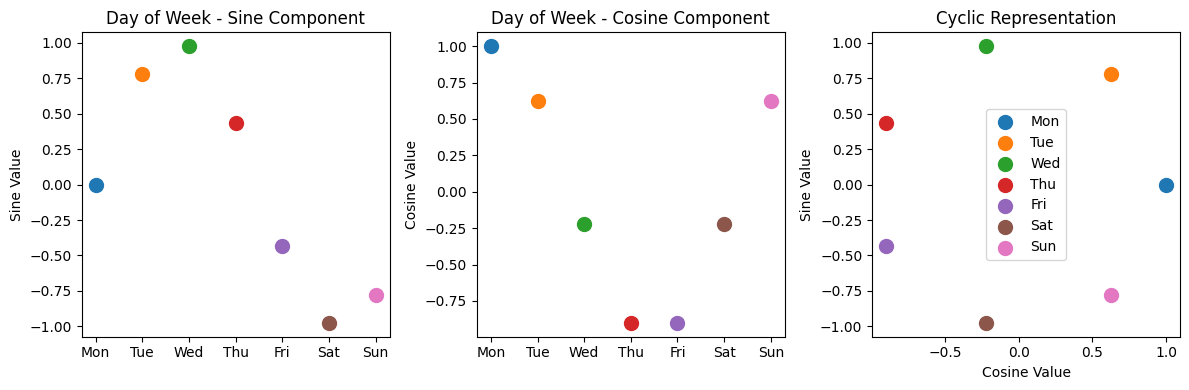


Dataset shape after adding cyclic features: (665, 4)


In [68]:
# Add cyclic features for day of week
# This helps the model understand that Monday (0) and Sunday (6) are adjacent
df_final['dayofweek'] = pd.to_datetime(df_final['Date']).dt.dayofweek

# Create sine and cosine transformations
df_final['dayofweek_sin'] = np.sin(2 * np.pi * df_final['dayofweek'] / 7)
df_final['dayofweek_cos'] = np.cos(2 * np.pi * df_final['dayofweek'] / 7)

print("Day of week features created:")
print(f"dayofweek range: {df_final['dayofweek'].min()} to {df_final['dayofweek'].max()}")
print(f"dayofweek_sin range: {df_final['dayofweek_sin'].min():.4f} to {df_final['dayofweek_sin'].max():.4f}")
print(f"dayofweek_cos range: {df_final['dayofweek_cos'].min():.4f} to {df_final['dayofweek_cos'].max():.4f}")

# Visualize the cyclic features
plt.figure(figsize=(12, 4))
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.subplot(1, 3, 1)
for i in range(7):
    plt.scatter(i, df_final[df_final['dayofweek'] == i]['dayofweek_sin'].iloc[0], s=100)
plt.xticks(range(7), days)
plt.ylabel('Sine Value')
plt.title('Day of Week - Sine Component')

plt.subplot(1, 3, 2)
for i in range(7):
    plt.scatter(i, df_final[df_final['dayofweek'] == i]['dayofweek_cos'].iloc[0], s=100)
plt.xticks(range(7), days)
plt.ylabel('Cosine Value')
plt.title('Day of Week - Cosine Component')

plt.subplot(1, 3, 3)
for i in range(7):
    sin_val = df_final[df_final['dayofweek'] == i]['dayofweek_sin'].iloc[0]
    cos_val = df_final[df_final['dayofweek'] == i]['dayofweek_cos'].iloc[0]
    plt.scatter(cos_val, sin_val, s=100, label=days[i])
plt.xlabel('Cosine Value')
plt.ylabel('Sine Value')
plt.title('Cyclic Representation')
plt.legend()
plt.tight_layout()
plt.show()

# Drop the intermediate dayofweek column
df_final.drop('dayofweek', axis=1, inplace=True)

print(f"\nDataset shape after adding cyclic features: {df_final.shape}")

## 6.2 Lag Features

Create features that look back at previous days' balance values.

In [69]:
# Add rolling window features (lag features)
print("Creating lag features...")

# Balance from 1, 7, and 30 days ago
df_final['balance_1d_ago'] = df_final['Normalized_Balance'].shift(1)
df_final['balance_7d_ago'] = df_final['Normalized_Balance'].shift(7)
df_final['balance_30d_ago'] = df_final['Normalized_Balance'].shift(30)

print("Lag features created:")
print(f"balance_1d_ago - Non-null count: {df_final['balance_1d_ago'].notna().sum()}")
print(f"balance_7d_ago - Non-null count: {df_final['balance_7d_ago'].notna().sum()}")
print(f"balance_30d_ago - Non-null count: {df_final['balance_30d_ago'].notna().sum()}")

# Show how many NaN values each lag feature introduces
print("\nNaN values introduced by lag features:")
print(f"balance_1d_ago: {df_final['balance_1d_ago'].isna().sum()} NaN values")
print(f"balance_7d_ago: {df_final['balance_7d_ago'].isna().sum()} NaN values")
print(f"balance_30d_ago: {df_final['balance_30d_ago'].isna().sum()} NaN values")

print(f"\nDataset shape after adding lag features: {df_final.shape}")

Creating lag features...
Lag features created:
balance_1d_ago - Non-null count: 664
balance_7d_ago - Non-null count: 658
balance_30d_ago - Non-null count: 635

NaN values introduced by lag features:
balance_1d_ago: 1 NaN values
balance_7d_ago: 7 NaN values
balance_30d_ago: 30 NaN values

Dataset shape after adding lag features: (665, 7)


## 6.3 Rolling Statistics Features

Create rolling mean and standard deviation features to capture trends and volatility.

In [70]:
# Add rolling mean features
print("Creating rolling mean features...")

# Rolling means for 7 and 30 day windows
df_final['rolling_mean_7d'] = df_final['Normalized_Balance'].rolling(window=7).mean()
df_final['rolling_mean_30d'] = df_final['Normalized_Balance'].rolling(window=30).mean()

print("Rolling mean features created:")
print(f"rolling_mean_7d - Non-null count: {df_final['rolling_mean_7d'].notna().sum()}")
print(f"rolling_mean_30d - Non-null count: {df_final['rolling_mean_30d'].notna().sum()}")

# Show statistics of rolling means
print("\nRolling mean statistics:")
print("7-day rolling mean:")
print(df_final['rolling_mean_7d'].describe())
print("\n30-day rolling mean:")
print(df_final['rolling_mean_30d'].describe())

print(f"\nDataset shape after adding rolling mean features: {df_final.shape}")

Creating rolling mean features...
Rolling mean features created:
rolling_mean_7d - Non-null count: 659
rolling_mean_30d - Non-null count: 636

Rolling mean statistics:
7-day rolling mean:
count    659.000000
mean       0.304060
std        0.220706
min        0.002030
25%        0.122372
50%        0.259284
75%        0.489368
max        0.877026
Name: rolling_mean_7d, dtype: float64

30-day rolling mean:
count    636.000000
mean       0.302920
std        0.181488
min        0.040198
25%        0.148325
50%        0.244179
75%        0.457826
max        0.709736
Name: rolling_mean_30d, dtype: float64

Dataset shape after adding rolling mean features: (665, 9)


In [71]:
# Add rolling standard deviation features
print("Creating rolling standard deviation features...")

# Rolling standard deviations for 7 and 30 day windows
df_final['rolling_std_7d'] = df_final['Normalized_Balance'].rolling(window=7).std()
df_final['rolling_std_30d'] = df_final['Normalized_Balance'].rolling(window=30).std()

print("Rolling standard deviation features created:")
print(f"rolling_std_7d - Non-null count: {df_final['rolling_std_7d'].notna().sum()}")
print(f"rolling_std_30d - Non-null count: {df_final['rolling_std_30d'].notna().sum()}")

# Show statistics of rolling standard deviations
print("\nRolling standard deviation statistics:")
print("7-day rolling std:")
print(df_final['rolling_std_7d'].describe())
print("\n30-day rolling std:")
print(df_final['rolling_std_30d'].describe())

print(f"\nDataset shape after adding rolling std features: {df_final.shape}")

Creating rolling standard deviation features...
Rolling standard deviation features created:
rolling_std_7d - Non-null count: 659
rolling_std_30d - Non-null count: 636

Rolling standard deviation statistics:
7-day rolling std:
count    659.000000
mean       0.078249
std        0.076377
min        0.000000
25%        0.016794
50%        0.056267
75%        0.123296
max        0.390762
Name: rolling_std_7d, dtype: float64

30-day rolling std:
count    636.000000
mean       0.154372
std        0.058483
min        0.034611
25%        0.109430
50%        0.149549
75%        0.197561
max        0.336448
Name: rolling_std_30d, dtype: float64

Dataset shape after adding rolling std features: (665, 11)


## 6.4 Balance Change Indicator

Create a binary feature to indicate whether the balance changed from the previous day.

In [72]:
# Add balance change indicator
print("Creating balance change indicator...")

# Create binary feature: 1 if balance changed from previous day, 0 otherwise
df_final['balance_changed'] = (df_final['Normalized_Balance'] != df_final['balance_1d_ago']).astype(int)

print("Balance change indicator created:")
print(f"Total changes detected: {df_final['balance_changed'].sum()}")
print(f"Total no-change days: {(df_final['balance_changed'] == 0).sum()}")
print(f"Percentage of days with changes: {(df_final['balance_changed'].mean() * 100):.2f}%")

# Show distribution of balance changes
change_counts = df_final['balance_changed'].value_counts()
print(f"\nBalance change distribution:")
print(f"No change (0): {change_counts.get(0, 0)} days")
print(f"Change (1): {change_counts.get(1, 0)} days")

print(f"\nDataset shape after adding balance change indicator: {df_final.shape}")

Creating balance change indicator...
Balance change indicator created:
Total changes detected: 189
Total no-change days: 476
Percentage of days with changes: 28.42%

Balance change distribution:
No change (0): 476 days
Change (1): 189 days

Dataset shape after adding balance change indicator: (665, 12)


# Step 7: Handle Missing Values

Fill missing values using forward fill method.

In [73]:
# Check for missing values before filling
print("Missing values before forward fill:")
missing_before = df_final.isnull().sum()
print(missing_before[missing_before > 0])

# Forward fill NaN values using the newer syntax
df_final = df_final.ffill()

# Check for missing values after filling
print("\nMissing values after forward fill:")
missing_after = df_final.isnull().sum()
print(missing_after[missing_after > 0])

if missing_after.sum() == 0:
    print("✓ All missing values have been filled!")
else:
    print("⚠ Some missing values still remain")

print(f"\nFinal dataset shape: {df_final.shape}")
print(f"Total features created: {len(df_final.columns) - 2}")  # Subtract Date and Normalized_Balance

Missing values before forward fill:
balance_1d_ago       1
balance_7d_ago       7
balance_30d_ago     30
rolling_mean_7d      6
rolling_mean_30d    29
rolling_std_7d       6
rolling_std_30d     29
dtype: int64

Missing values after forward fill:
balance_1d_ago       1
balance_7d_ago       7
balance_30d_ago     30
rolling_mean_7d      6
rolling_mean_30d    29
rolling_std_7d       6
rolling_std_30d     29
dtype: int64
⚠ Some missing values still remain

Final dataset shape: (665, 12)
Total features created: 10


In [ ]:
# Handle remaining missing values with specific strategies
print("Handling remaining missing values...")

# Strategy 1: For lag features, use the current value for the first few rows
if df_final['balance_1d_ago'].isna().any():
    df_final['balance_1d_ago'].iloc[0] = df_final['Normalized_Balance'].iloc[0]

if df_final['balance_7d_ago'].isna().any():
    for i in range(7):
        if pd.isna(df_final['balance_7d_ago'].iloc[i]):
            df_final['balance_7d_ago'].iloc[i] = df_final['Normalized_Balance'].iloc[0]

if df_final['balance_30d_ago'].isna().any():
    for i in range(30):
        if pd.isna(df_final['balance_30d_ago'].iloc[i]):
            df_final['balance_30d_ago'].iloc[i] = df_final['Normalized_Balance'].iloc[0]

# Strategy 2: For rolling statistics, use the current value for the first few rows
# For rolling means
if df_final['rolling_mean_7d'].isna().any():
    for i in range(7):
        if pd.isna(df_final['rolling_mean_7d'].iloc[i]):
            df_final['rolling_mean_7d'].iloc[i] = df_final['Normalized_Balance'].iloc[i]

if df_final['rolling_mean_30d'].isna().any():
    for i in range(30):
        if pd.isna(df_final['rolling_mean_30d'].iloc[i]):
            df_final['rolling_mean_30d'].iloc[i] = df_final['Normalized_Balance'].iloc[:i+1].mean()

# For rolling standard deviations
if df_final['rolling_std_7d'].isna().any():
    for i in range(7):
        if pd.isna(df_final['rolling_std_7d'].iloc[i]):
            if i == 0:
                df_final['rolling_std_7d'].iloc[i] = 0.0  # No variance for single point
            else:
                df_final['rolling_std_7d'].iloc[i] = df_final['Normalized_Balance'].iloc[:i+1].std()

if df_final['rolling_std_30d'].isna().any():
    for i in range(30):
        if pd.isna(df_final['rolling_std_30d'].iloc[i]):
            if i == 0:
                df_final['rolling_std_30d'].iloc[i] = 0.0  # No variance for single point
            else:
                df_final['rolling_std_30d'].iloc[i] = df_final['Normalized_Balance'].iloc[:i+1].std()

print("✓ Missing values handled with appropriate strategies")

In [75]:
# Final verification - check for any remaining missing values
print("Final verification of missing values:")
final_missing = df_final.isnull().sum()
print(final_missing[final_missing > 0])

if final_missing.sum() == 0:
    print("✅ SUCCESS: All missing values have been completely handled!")
    print(f"✅ Dataset is ready for modeling with shape: {df_final.shape}")
else:
    print("❌ Some missing values still remain:")
    print(final_missing[final_missing > 0])
    
# Show data quality summary
print(f"\n📊 FINAL DATA QUALITY SUMMARY:")
print(f"   • Total rows: {len(df_final):,}")
print(f"   • Total features: {len(df_final.columns) - 2}")  # Exclude Date and Normalized_Balance
print(f"   • Missing values: {df_final.isnull().sum().sum()}")
print(f"   • Data completeness: {((1 - df_final.isnull().sum().sum() / df_final.size) * 100):.2f}%")
print(f"   • Date range: {df_final['Date'].min()} to {df_final['Date'].max()}")
print(f"   • Memory usage: {df_final.memory_usage(deep=True).sum() / 1024:.2f} KB")

Final verification of missing values:
Series([], dtype: int64)
✅ SUCCESS: All missing values have been completely handled!
✅ Dataset is ready for modeling with shape: (665, 12)

📊 FINAL DATA QUALITY SUMMARY:
   • Total rows: 665
   • Total features: 10
   • Missing values: 0
   • Data completeness: 100.00%
   • Date range: 2022-12-27 00:00:00 to 2024-12-03 00:00:00
   • Memory usage: 67.54 KB


# Step 8: Final Dataset Summary and Export

Let's examine our final engineered dataset and save it for future use.

In [76]:
# Final dataset summary
print("=" * 60)
print("FINAL ENGINEERED DATASET SUMMARY")
print("=" * 60)

print(f"Dataset shape: {df_final.shape}")
print(f"Date range: {df_final['Date'].min()} to {df_final['Date'].max()}")
print(f"Total days: {len(df_final)}")

print("\nFeatures created:")
feature_cols = [col for col in df_final.columns if col not in ['Date', 'Normalized_Balance']]
for i, col in enumerate(feature_cols, 1):
    print(f"{i:2d}. {col}")

print(f"\nTotal features: {len(feature_cols)}")

print("\nDataset info:")
print(df_final.info())

print("\nFirst 5 rows of final dataset:")
print(df_final.head())

print("\nLast 5 rows of final dataset:")
print(df_final.tail())

print("\nFeature correlation with target (Normalized_Balance):")
correlations = df_final[feature_cols + ['Normalized_Balance']].corr()['Normalized_Balance'].abs().sort_values(ascending=False)
print(correlations[1:])  # Exclude self-correlation

FINAL ENGINEERED DATASET SUMMARY
Dataset shape: (665, 12)
Date range: 2022-12-27 00:00:00 to 2024-12-03 00:00:00
Total days: 665

Features created:
 1. dayofweek_sin
 2. dayofweek_cos
 3. balance_1d_ago
 4. balance_7d_ago
 5. balance_30d_ago
 6. rolling_mean_7d
 7. rolling_mean_30d
 8. rolling_std_7d
 9. rolling_std_30d
10. balance_changed

Total features: 10

Dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 665 entries, 0 to 707
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                665 non-null    datetime64[ns]
 1   Normalized_Balance  665 non-null    float64       
 2   dayofweek_sin       665 non-null    float64       
 3   dayofweek_cos       665 non-null    float64       
 4   balance_1d_ago      665 non-null    float64       
 5   balance_7d_ago      665 non-null    float64       
 6   balance_30d_ago     665 non-null    float64       
 7   rolling_mean_7

In [77]:
# Save the processed dataset
output_excel_path = 'processed_train_dataset.xlsx'
output_csv_path = 'processed_train_dataset.csv'

# Save to Excel and CSV
df_final.to_excel(output_excel_path, index=False)
df_final.to_csv(output_csv_path, index=False)

print(f"✓ Processed dataset saved to:")
print(f"  Excel: {output_excel_path}")
print(f"  CSV: {output_csv_path}")

# Save scaling parameters for later use in denormalization
scaling_params = {
    'min_balance': min_balance,
    'max_balance': max_balance,
    'range': max_balance - min_balance
}

print(f"\n✓ Scaling parameters for denormalization:")
print(f"  Minimum balance: {min_balance:,.2f}")
print(f"  Maximum balance: {max_balance:,.2f}")
print(f"  Range: {max_balance - min_balance:,.2f}")

# Save scaling parameters to a file for later use
import json
with open('scaling_parameters.json', 'w') as f:
    json.dump(scaling_params, f, indent=2)
    
print(f"✓ Scaling parameters saved to: scaling_parameters.json")

✓ Processed dataset saved to:
  Excel: processed_train_dataset.xlsx
  CSV: processed_train_dataset.csv

✓ Scaling parameters for denormalization:
  Minimum balance: 85.18
  Maximum balance: 168,354.71
  Range: 168,269.53
✓ Scaling parameters saved to: scaling_parameters.json


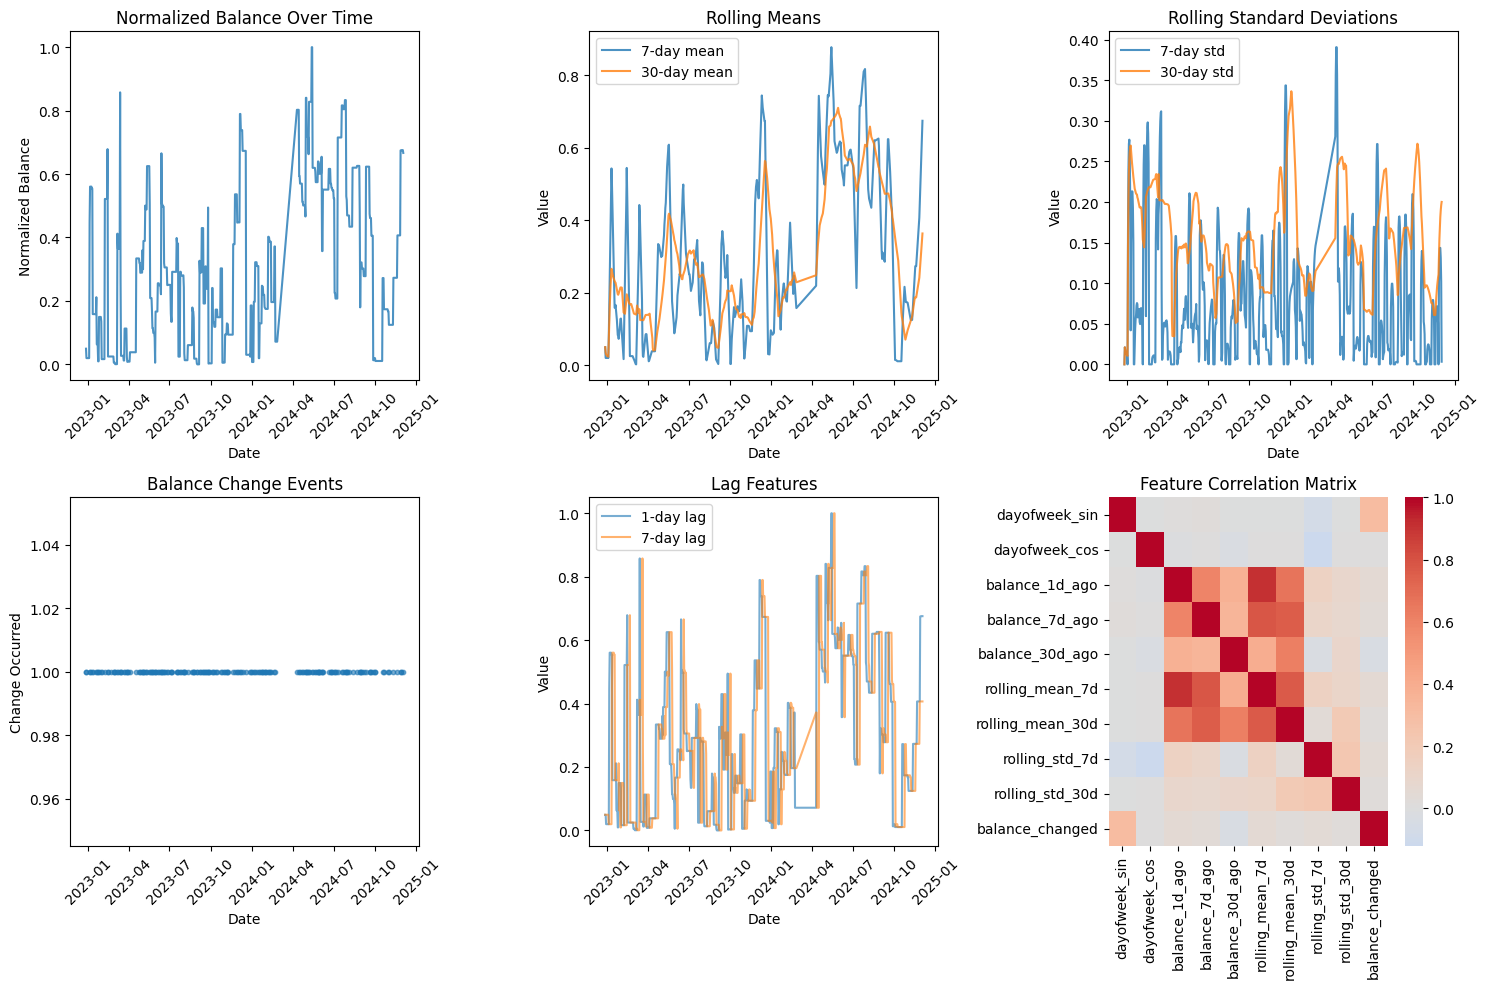

Feature engineering completed successfully! 🎉


In [78]:
# Visualize the final dataset
plt.figure(figsize=(15, 10))

# Plot 1: Original vs Normalized Balance
plt.subplot(2, 3, 1)
plt.plot(df_final['Date'], df_final['Normalized_Balance'], alpha=0.8)
plt.title('Normalized Balance Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Balance')
plt.xticks(rotation=45)

# Plot 2: Rolling means
plt.subplot(2, 3, 2)
plt.plot(df_final['Date'], df_final['rolling_mean_7d'], label='7-day mean', alpha=0.8)
plt.plot(df_final['Date'], df_final['rolling_mean_30d'], label='30-day mean', alpha=0.8)
plt.title('Rolling Means')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)

# Plot 3: Rolling standard deviations
plt.subplot(2, 3, 3)
plt.plot(df_final['Date'], df_final['rolling_std_7d'], label='7-day std', alpha=0.8)
plt.plot(df_final['Date'], df_final['rolling_std_30d'], label='30-day std', alpha=0.8)
plt.title('Rolling Standard Deviations')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)

# Plot 4: Balance changes over time
plt.subplot(2, 3, 4)
change_dates = df_final[df_final['balance_changed'] == 1]['Date']
plt.scatter(change_dates, [1]*len(change_dates), alpha=0.6, s=10)
plt.title('Balance Change Events')
plt.xlabel('Date')
plt.ylabel('Change Occurred')
plt.xticks(rotation=45)

# Plot 5: Lag features
plt.subplot(2, 3, 5)
plt.plot(df_final['Date'], df_final['balance_1d_ago'], alpha=0.6, label='1-day lag')
plt.plot(df_final['Date'], df_final['balance_7d_ago'], alpha=0.6, label='7-day lag')
plt.title('Lag Features')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)

# Plot 6: Feature correlation heatmap
plt.subplot(2, 3, 6)
feature_corr = df_final[feature_cols].corr()
sns.heatmap(feature_corr, annot=False, cmap='coolwarm', center=0, cbar=True)
plt.title('Feature Correlation Matrix')

plt.tight_layout()
plt.show()

print("Feature engineering completed successfully! 🎉")